# Importar datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [2]:
data_completa = pd.read_csv('data_completa.csv')
data_completa.head(2)

,id_jugador,nombre_jugador,version_x,posiciones,est_general_x,valor_de_mercado,salario_semanal,edad,nacimiento,altura,...,id_nacionalidad_y,nacion_liga,est_general_y,ataque,mediocampo,defensa_y,promedio_edad_titulares,promedio_edad_equipo,cluster,categoria
0,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,05 01 1982,181,...,27,italia,74,75,72,74,26.18,24.97,0,Promesas
1,11,Romain Rocchi,2015,"MEC, MCD",68,675000,8000,32,02 10 1981,183,...,18,francia,69,70,70,68,27.91,24.47,0,Promesas


# Comparación Haaland vs. Mbappé

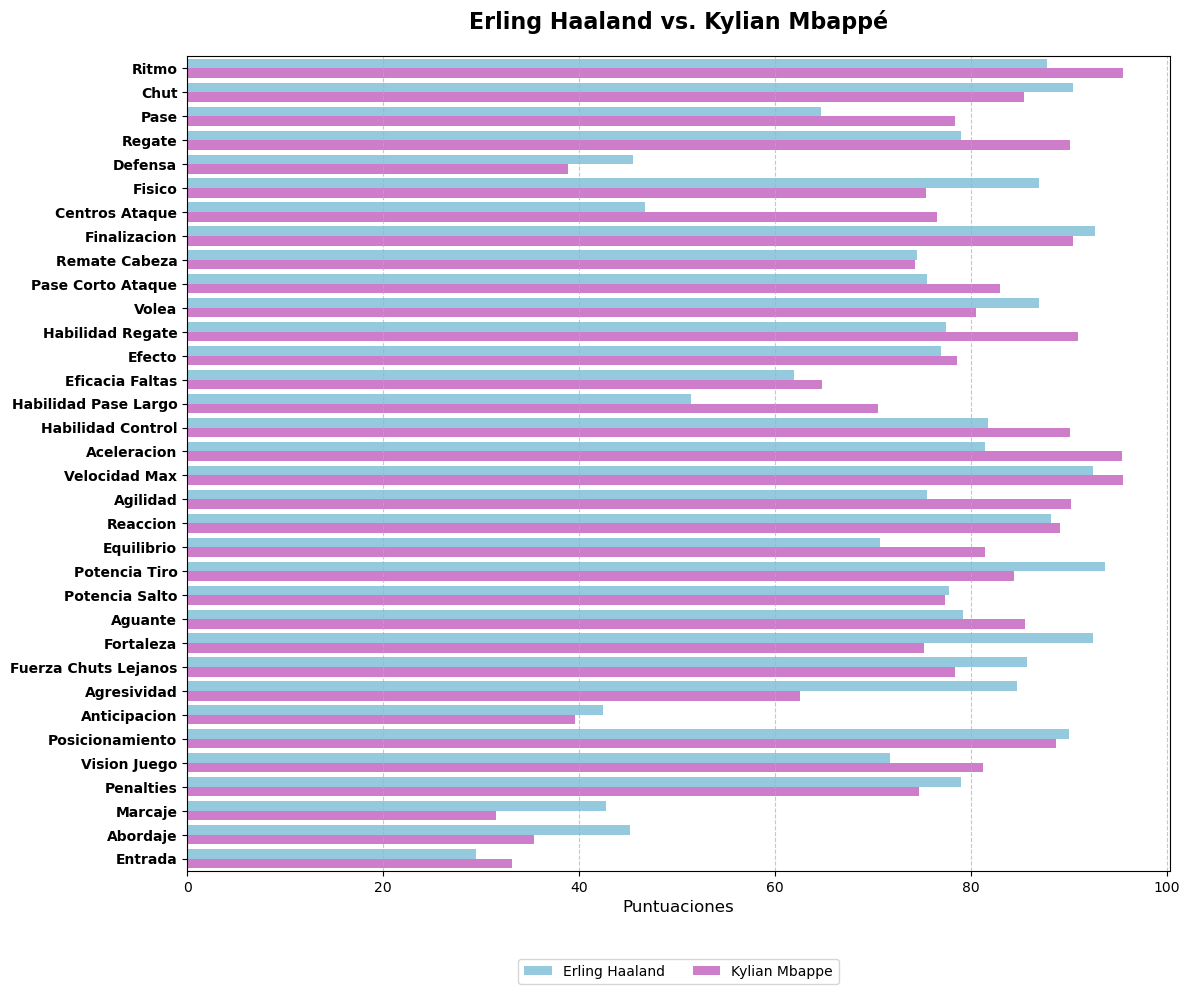

In [3]:
jugadores_interes = ['Kylian Mbappe', 'Erling Haaland']
data_jugadores = data_completa[data_completa['nombre_jugador'].isin(jugadores_interes)]

columns_of_interest = data_completa.loc[:, 'ritmo':'entrada'].columns

data_promedios = data_jugadores.groupby(['nombre_jugador', 'version_x'])[columns_of_interest].mean().reset_index()

data_promedios_m = data_promedios.melt(id_vars=['nombre_jugador', 'version_x'], var_name='Atributo', value_name='Promedio')

data_promedios_m['Atributo'] = data_promedios_m['Atributo'].str.replace('_', ' ').str.title()
data_promedios_m['Atributo'] = data_promedios_m['Atributo'].replace('Defensa X', 'Defensa')

plt.figure(figsize=(12, 10))
sns.barplot(
    data=data_promedios_m,
    x='Promedio',
    y='Atributo',
    hue='nombre_jugador',
    palette={'Kylian Mbappe': 'orchid', 'Erling Haaland': 'skyblue'},
    errorbar=None,
    dodge=True
)
plt.title('Erling Haaland vs. Kylian Mbappé', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Puntuaciones', fontsize=12)
plt.ylabel(None)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title=None, loc='upper center', bbox_to_anchor=(0.5, -0.1), fontsize=10, ncol=2)
plt.gca().set_facecolor('white')
plt.tight_layout()

plt.show()

# Mapa posiciones

Versiones disponibles para 'laporte':
- 2015 (Equipo: athletic club de bilbao)
- 2016 (Equipo: athletic club de bilbao)
- 2017 (Equipo: athletic club de bilbao)
- 2018 (Equipo: athletic club de bilbao)
- 2019 (Equipo: manchester city)
- 2020 (Equipo: manchester city)
- 2021 (Equipo: manchester city)
- 2022 (Equipo: manchester city)
- 2023 (Equipo: manchester city)
- 2024 (Equipo: al nassr)
Jugador encontrado: Aymeric Laporte, Versión: 2018, Equipo: Athletic Club De Bilbao


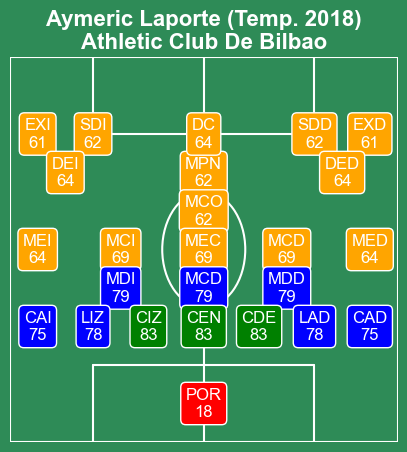

In [11]:
position_to_column = {
    'lw': 'extr_izq','lf': 'seg_del_izq','cf': 'media_punta','rf': 'seg_del_dch','rw': 'extr_dch',
    'ls': 'del_izq','st': 'del','rs': 'del_dch','lam': 'med_cen_of_izq','cam': 'med_cen_of','ram': 'med_cen_of_dch','lm': 'med_izq',
    'lcm': 'med_cen_izq','cm': 'med_cen','rcm': 'med_cen_dch','rm': 'med_dch','ldm': 'med_def_izq',
    'cdm': 'med_cen_def','rdm': 'med_cen_def_dch','lwb': 'carr_izq','lb': 'lat_izq','lcb': 'def_cen_izq',
    'cb': 'def_cen','rcb': 'def_cen_dch','rb': 'lat_dch','rwb': 'carr_dch','gk': 'portero'
}
position_labels = {
    'GK': 'POR','RWB': 'CAD','RB': 'LAD','CB': 'CEN','RCB': 'CDE','LCB': 'CIZ','LB': 'LIZ','LWB': 'CAI','RM': 'MED',
    'CM': 'MEC','LM': 'MEI','CDM': 'MCD','CAM': 'MCO','RF': 'SDD','CF': 'MPN','LF': 'SDI','RW': 'EXD','ST': 'DC',
    'LW': 'EXI','LS': 'DEI','RS': 'DED','LAM': 'MOI','RAM': 'MOD','LCM': 'MCI','RCM': 'MCD','LDM': 'MDI','RDM': 'MDD'}

def plot_player_positions_with_grass_background_only(player_name, selected_version, promesas):
    data_completa['nombre_normalizado'] = data_completa['nombre_jugador'].str.lower()
    player_name_normalized = player_name.lower()

    name_parts = player_name_normalized.split()
    player_data = data_completa[
        data_completa['nombre_normalizado'].apply(lambda x: all(part in x for part in name_parts))
    ]
    
    if player_data.empty:
        print(f"No se encontró ningún jugador con coincidencia para '{player_name}'.")
        return

    available_versions = player_data['version_x'].unique()
    print(f"Versiones disponibles para '{player_name}':")
    for version in available_versions:
        team = player_data[player_data['version_x'] == version]['nombre_club_y'].iloc[0]
        print(f"- {version} (Equipo: {team})")
    
    if str(selected_version) not in map(str, available_versions):
        print(f"La versión seleccionada '{selected_version}' no está disponible para '{player_name}'.")
        return

    player_data = player_data[player_data['version_x'].astype(str) == str(selected_version)]
    
    best_match = player_data.iloc[0]['nombre_jugador']
    selected_team = player_data.iloc[0]['nombre_club_y'].title()
    print(f"Jugador encontrado: {best_match}, Versión: {selected_version}, Equipo: {selected_team}")
    
    position_ratings = {}
    for pos, col in position_to_column.items():
        if col in player_data.columns:
            position_ratings[pos] = int(player_data.iloc[0][col]) if not pd.isna(player_data.iloc[0][col]) else 0
        else:
            position_ratings[pos] = 0

    fig, ax = plt.subplots(figsize=(5, 5))
    fig.patch.set_facecolor('#2E8B57')
    ax.set_facecolor('#2E8B57')
    ax.set_xlim(0, 7)
    ax.set_ylim(0, 5)
    ax.axis('off')

    # Dibujar las líneas del campo de fútbol
    field_lines = [
        [(0, 0), (7, 0)],  # Línea de gol inferior
        [(0, 5), (7, 5)],  # Línea de gol superior
        [(0, 0), (0, 5)],  # Línea lateral izquierda
        [(7, 0), (7, 5)],  # Línea lateral derecha
        [(3.5, 0), (3.5, 5)],  # Línea central
        [(1.5, 0), (1.5, 1)],  # Área de penal izquierda
        [(5.5, 0), (5.5, 1)],  # Área de penal derecha
        [(1.5, 4), (1.5, 5)],  # Área de penal superior izquierda
        [(5.5, 4), (5.5, 5)],  # Área de penal superior derecha
        [(1.5, 1), (5.5, 1)],  # Línea de penal inferior
        [(1.5, 4), (5.5, 4)],  # Línea de penal superior
    ]
    for line in field_lines:
        ax.plot(*zip(*line), color='white', linewidth=1.5)

    center_circle = plt.Circle((3.5, 2.5), 0.75, color='white', fill=False, linewidth=1.5)
    ax.add_patch(center_circle)

    position_grid = {
        'lw': (0.5, 4), 'lf': (1.5, 4), 'cf': (3.5, 3.5), 'rf': (5.5, 4), 'rw': (6.5, 4),
        'ls': (1, 3.5), 'st': (3.5, 4), 'rs': (6, 3.5),
         'cam': (3.5, 3), 
        'lm': (0.5, 2.5), 'lcm': (2, 2.5), 'cm': (3.5, 2.5), 'rcm': (5, 2.5), 'rm': (6.5, 2.5),
        'ldm': (2, 2), 'cdm': (3.5, 2), 'rdm': (5, 2),
        'lwb': (0.5, 1.5), 'lb': (1.5, 1.5), 'lcb': (2.5, 1.5), 'cb': (3.5, 1.5), 'rcb': (4.5, 1.5), 'rb': (5.5, 1.5), 'rwb': (6.5, 1.5),
        'gk': (3.5, 0.5)
    }

    for pos, (x, y) in position_grid.items():
        rating = position_ratings.get(pos, 0)
        color = 'green' if rating >= 80 else 'blue' if rating >= 70 else 'orange' if rating >= 60 else 'red'
        label = position_labels.get(pos.upper(), pos.upper())
        ax.text(x, y, f"{label}\n{rating}", color='white', ha='center', va='center',
                bbox=dict(facecolor=color, edgecolor='white', boxstyle='round,pad=0.3'))

    plt.title(f"{best_match} (Temp. {selected_version})\n{selected_team}", fontsize=16, color='white', fontweight='bold')
    plt.show()

plot_player_positions_with_grass_background_only("laporte", "2018", data_completa)

# Estadistica Leo Messi

In [ ]:
messi_data = data[data['nombre_jugador'] == 'Lionel Messi']

start_index = messi_data.columns.get_loc('ritmo')
end_index = messi_data.columns.get_loc('entrada') + 1
selected_attributes = messi_data.iloc[:, start_index:end_index]

messi_mean_selected_attributes = selected_attributes.mean()

formatted_attributes = (
    messi_mean_selected_attributes[::-1]
    .rename(index=lambda x: x.replace('_', ' ').title())
    .rename(index={'Defensa X': 'Defensa'})
)

cmap = cm.get_cmap('viridis', len(formatted_attributes))
colors = cmap(range(len(formatted_attributes)))


plt.figure(figsize=(10, 9))
formatted_attributes.plot(kind='barh', color=colors, edgecolor='blue', width=0.8)
plt.title('Estadísticas - Lionel Messi', fontweight='bold')
plt.xlabel('Valoración')
plt.ylabel('Atributos')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

# Equipos mejor valorados

In [ ]:
clubes = [
    'liverpool', 'manchester city', 'chelsea', 'real madrid cf', 
    'atletico de madrid', 'fc barcelona', 'fc bayern munchen', 
    'bayer 04 leverkusen', 'borussia dortmund', 'ac milan', 
    'inter', 'napoli', 'paris saint germain'
]

filtered_data = data_completa[data_completa['nombre_club_y'].isin(clubes)]

club_means_with_general = filtered_data.groupby('nombre_club_y')[['ataque', 'mediocampo', 'defensa_y', 'est_general_y']].mean()

club_means_with_general.rename(index={
    'real madrid cf': 'Real Madrid CF',
    'fc bayern munchen': 'FC Bayern Munchen',
    'fc barcelona': 'FC Barcelona',
    'ac milan': 'AC Milan',
    'paris saint germain': 'Paris Saint Germain',
    'atletico de madrid': 'Atl de Madrid',
    'napoli': 'Napoles',
    'inter': 'Inter',
    'bayer 04 leverkusen': 'Bayer Leverkusen',
    'borussia dortmund': 'Borussia Dortmund',
    'liverpool': 'Liverpool',
    'chelsea': 'Chelsea',
    'manchester city': 'Manchester City',
}, inplace=True)

fig, ax = plt.subplots(figsize=(14, 8))

colors = plt.cm.viridis([0.2, 0.4, 0.6, 0.8])

club_means_with_general.plot(kind='barh', ax=ax, alpha=0.85, color=colors)

plt.title('Estadísticas - Mejores Equipos', fontsize=18, weight='bold')
plt.xlabel('Puntuación', fontsize=14)
plt.ylabel('')
plt.legend(title='', loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

ax.set_yticklabels([team for team in club_means_with_general.index], fontsize=12, weight='bold')

plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

# Porcentaje de juagadores categoria

/var/folders/0y/vr1ljtzx2b73qn927g15y8jr0000gn/T/ipykernel_8513/908051152.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


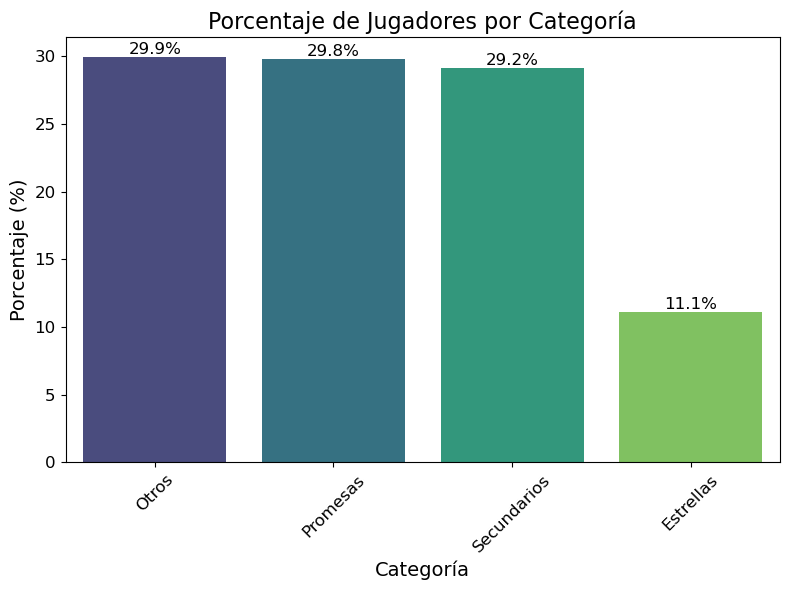

In [6]:
# Confirmar que la columna 'categoria' existe en el DataFrame
if 'categoria' in data_completa.columns:
    # Contar la cantidad de jugadores por categoría
    categoria_counts = data_completa['categoria'].value_counts()

    # Calcular el porcentaje
    total_jugadores = len(data_completa)
    categoria_percentages = (categoria_counts / total_jugadores) * 100

    # Crear un DataFrame para visualizar
    resultados_categoria = pd.DataFrame({
        'Categoría': categoria_counts.index,
        'Número de jugadores': categoria_counts.values,
        'Porcentaje (%)': categoria_percentages.values
    })

    plt.figure(figsize=(8, 6))
    ax = sns.barplot(
        x='Categoría',
        y='Porcentaje (%)',
        data=resultados_categoria,
        palette='viridis'  # Usar la paleta 'viridis'
    )
    plt.title('Porcentaje de Jugadores por Categoría', fontsize=16)
    plt.xlabel('Categoría', fontsize=14)
    plt.ylabel('Porcentaje (%)', fontsize=14)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    
    # Añadir los porcentajes encima de cada barra
    for i, bar in enumerate(ax.patches):
        ax.annotate(
            f"{resultados_categoria['Porcentaje (%)'][i]:.1f}%",
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha='center', va='bottom', fontsize=12, color='black'
        )

    plt.tight_layout()
    plt.show()

else:
    print("La columna 'categoria' no se encuentra en el DataFrame. Verifica el nombre de la columna.")

# Analisis de atributos por cluster

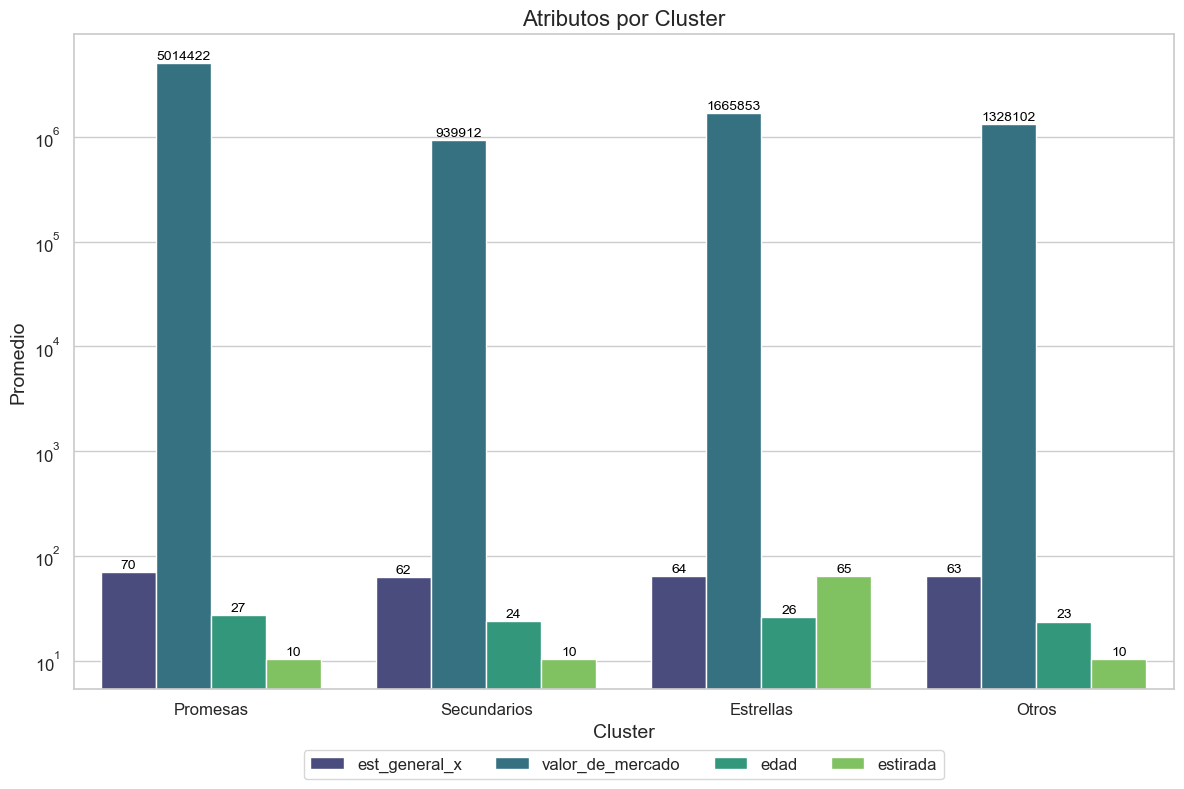

In [7]:
columnas_a_graficar = [
    'est_general_x',
    'valor_de_mercado',
    'edad',
    'estirada'
]

# Diccionario para renombrar los valores del eje x
etiquetas_cluster = {
    0: 'Promesas',
    1: 'Secundarios',
    2: 'Estrellas',
    3: 'Otros'
}

# Configurar estilo
sns.set_theme(style="whitegrid")

# Agrupar por cluster y calcular promedios
promedios_por_cluster = data_completa.groupby('cluster')[columnas_a_graficar].mean().reset_index()

# Convertir las métricas a formato largo para graficar con seaborn
promedios_por_cluster_melted = promedios_por_cluster.melt(id_vars='cluster', value_vars=columnas_a_graficar,
                                                          var_name='Métrica', value_name='Valor')

# Reemplazar los números de los clusters con los nombres
promedios_por_cluster_melted['cluster'] = promedios_por_cluster_melted['cluster'].map(etiquetas_cluster)

# Crear gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=promedios_por_cluster_melted, x='cluster', y='Valor', hue='Métrica', palette='viridis')

# Añadir valores encima de las barras (sin decimales)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Mostrar el valor como entero (sin decimales)
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Usar escala logarítmica en el eje Y para mejorar la visualización
ax.set_yscale('log')

# Título y etiquetas
plt.title('Atributos por Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Promedio', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='', loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()




# Analisis individual de clusters

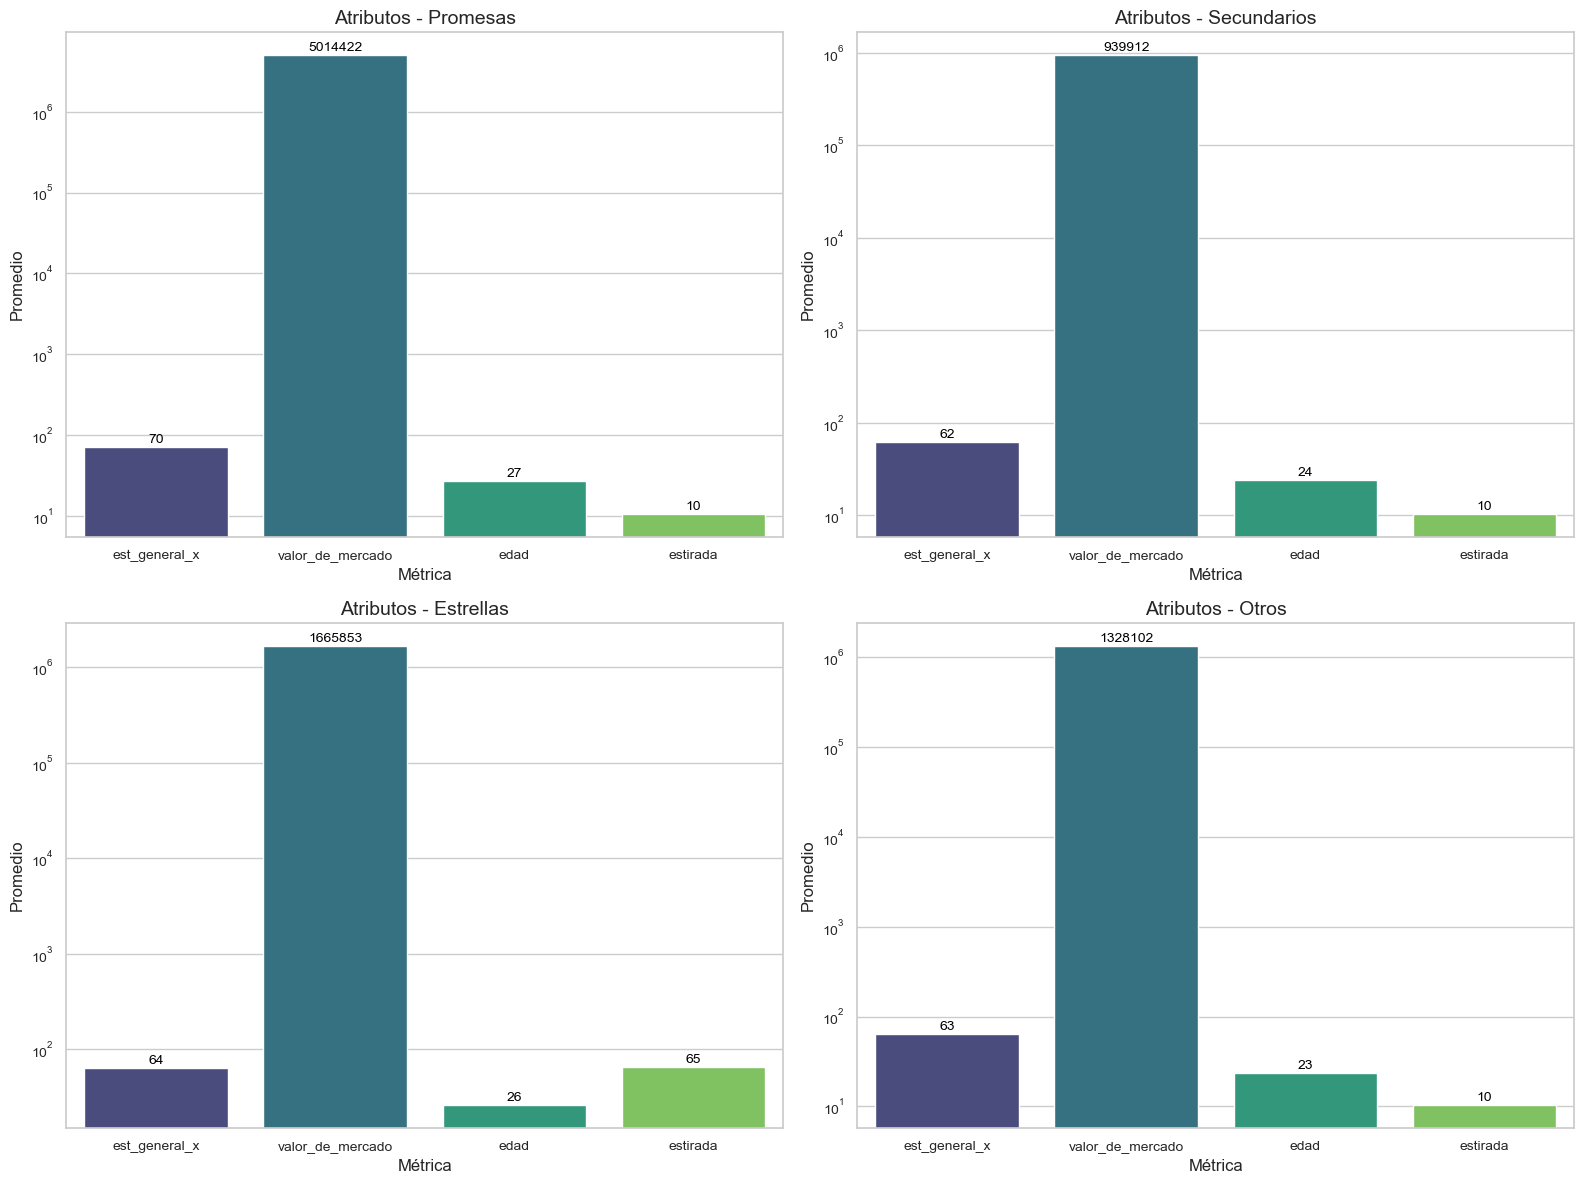

In [8]:
# Lista de columnas a graficar
columnas_a_graficar = [
    'est_general_x',
    'valor_de_mercado',
    'edad',
    'estirada'
]

# Diccionario para renombrar los valores del eje x
etiquetas_cluster = {
    0: 'Promesas',
    1: 'Secundarios',
    2: 'Estrellas',
    3: 'Otros'
}

# Configurar estilo
sns.set_theme(style="whitegrid")

# Agrupar por cluster y calcular promedios
promedios_por_cluster = data_completa.groupby('cluster')[columnas_a_graficar].mean().reset_index()

# Convertir las métricas a formato largo para graficar con seaborn
promedios_por_cluster_melted = promedios_por_cluster.melt(id_vars='cluster', value_vars=columnas_a_graficar,
                                                          var_name='Métrica', value_name='Valor')

# Reemplazar los números de los clusters con los nombres
promedios_por_cluster_melted['cluster'] = promedios_por_cluster_melted['cluster'].map(etiquetas_cluster)

# Crear subgráficos (uno por cluster)
unique_clusters = promedios_por_cluster_melted['cluster'].unique()

# Establecer el tamaño de la figura
plt.figure(figsize=(16, 12))

# Crear un gráfico por cluster
for i, cluster in enumerate(unique_clusters):
    ax = plt.subplot(2, 2, i + 1)  # Crear una matriz 2x2 para los gráficos
    cluster_data = promedios_por_cluster_melted[promedios_por_cluster_melted['cluster'] == cluster]
    
    sns.barplot(data=cluster_data, x='Métrica', y='Valor', hue='Métrica', palette='viridis', ax=ax)
    
    # Añadir valores encima de las barras
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',  # Mostrar el valor como entero (sin decimales)
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')
    
    # Usar escala logarítmica en el eje Y para mejorar la visualización
    ax.set_yscale('log')
    
    # Título y etiquetas
    ax.set_title(f'Atributos - {cluster}', fontsize=14)
    ax.set_xlabel('Métrica', fontsize=12)
    ax.set_ylabel('Promedio', fontsize=12)
    ax.tick_params(axis='both', labelsize=10)

# Ajustar el layout para que los subgráficos no se sobrepongan
plt.tight_layout()
plt.show()